#Overview
General tools to visualize volatility smiles.

In [1]:
# 😎 Manual inputs:
symbol        = "TSM"

#Implementation

In [ ]:
!pip install yahoo_fin
!pip install yfinance

In [21]:
import pandas as pd
from datetime import date, datetime
from yahoo_fin import options
import yfinance as yf
import numpy as np
import math
import matplotlib.pyplot as plt

In [22]:
ticker_yahoo = yf.Ticker(symbol)
data = ticker_yahoo.history()
crnt_price = data['Close'].iloc[-1]
crnt_price

89.58000183105469

In [23]:
date_today = data.index[len(data)-1].date()
date_today

datetime.date(2023, 3, 6)

In [24]:
def get_data(contract_type):
  chains, list_ttm, list_moneyness, list_iv = {}, [], [], []
  
  for date_expire_str in options.get_expiration_dates(symbol):
    
    chain = options.get_options_chain(symbol, date_expire_str)[contract_type]
    _exp_date = datetime.strptime(date_expire_str, '%B %d, %Y').date()
    ttm = (date(_exp_date.year,_exp_date.month,_exp_date.day)-date_today).days

    chains[ttm] = chain

    for i in range(len(chain)-1):
      iv = float(chain["Implied Volatility"][i].strip("%"))
      if iv < 100:
        k = chain["Strike"][i]
        list_ttm.append(ttm)
        list_moneyness.append(crnt_price/k)
        list_iv.append(iv)
  return (chains, list_ttm, list_moneyness, list_iv)

In [25]:

def do_plots(chains, list_ttm, list_moneyness, list_iv):
  # Term Structure
  list_x_atm, list_y_atm = [],[]

  for ttm in chains.keys():
    df = chains[ttm]
    df_filtered = df[(df["Strike"]>crnt_price)]
    list_x_atm.append(ttm)
    list_y_atm.append(float(df_filtered["Implied Volatility"][df_filtered.index[0]].strip("%")))
  
  plt.plot(list_x_atm,list_y_atm, label="ATM Strike: " + contract_type)
  plt.legend()
  plt.xlabel("Time to maturity (Days)")
  plt.ylabel("Implied Volatility (%)")
  plt.show()

  # Volatility Surface: Angle 1
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d') 
  for i in range(len(list_ttm)-1):
    ax.scatter(list_ttm[i], list_moneyness[i], list_iv[i], marker="o") 

  ax.set_xlabel("Time to maturity (Days)")
  ax.set_ylabel("Moneyness")
  ax.set_zlabel("Implied Volatility (%)")
  plt.show()

  # Volatility Surface: Angle 2
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d') 
  for i in range(len(list_ttm)-1):
    ax.scatter(list_moneyness[i], list_ttm[i], list_iv[i], marker="o") 

  ax.set_xlabel("Moneyness")
  ax.set_ylabel("Time to maturity (Days)")
  ax.set_zlabel("Implied Volatility (%)")
  plt.show()

#😎 Calls

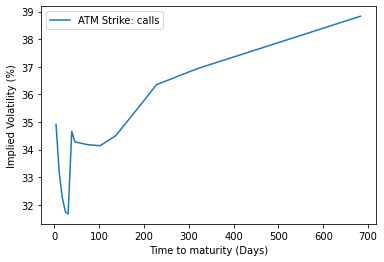

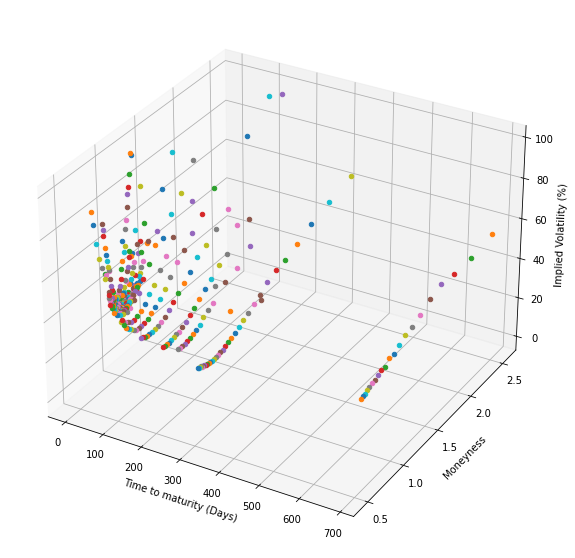

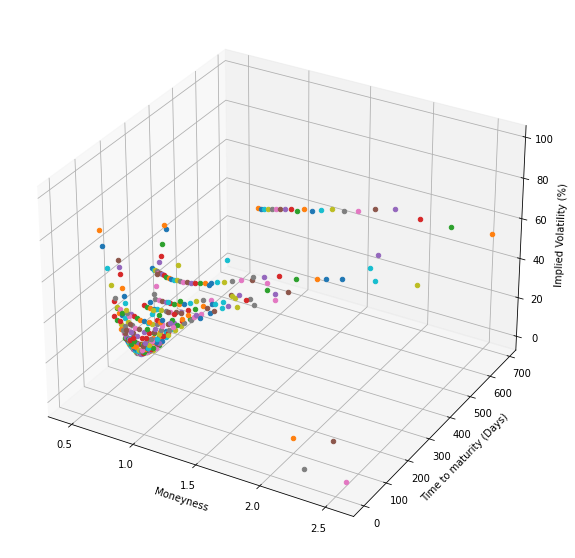

In [26]:
contract_type = "calls"
chains_calls, ttm_calls, moneyness_calls, iv_calls = get_data(contract_type)
do_plots(chains_calls, ttm_calls, moneyness_calls, iv_calls)

#😎 Puts

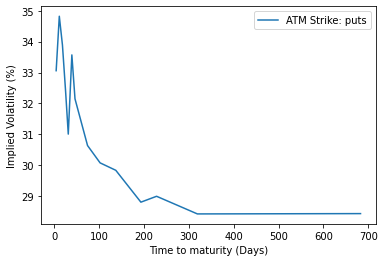

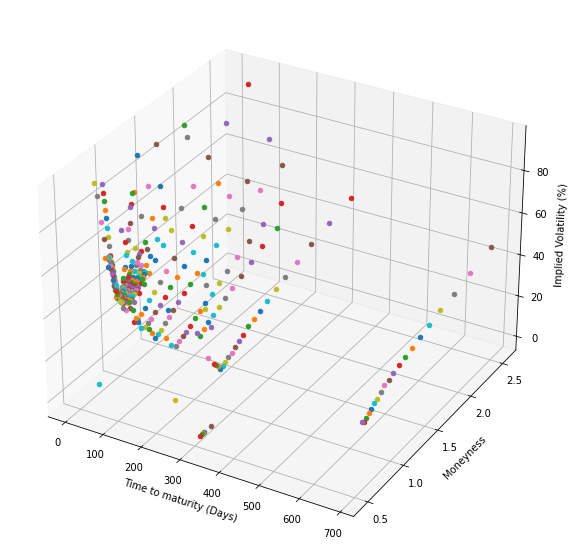

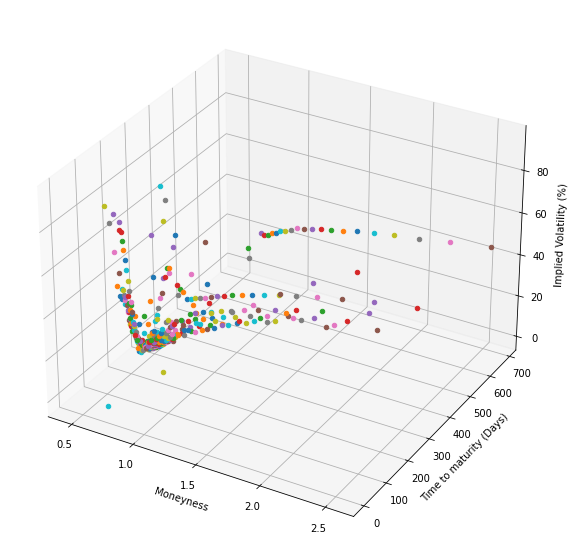

In [27]:
contract_type = "puts"
chains_calls, ttm_calls, moneyness_calls, iv_calls = get_data(contract_type)
do_plots(chains_calls, ttm_calls, moneyness_calls, iv_calls)